<a href="https://colab.research.google.com/github/AntonioCalz/CALZADILLA/blob/main/Reporte_Final_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#%% [markdown]
# Exploración de Synergy Logistics DB

In [2]:
#%% [code]
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
#Muestre los primeros 500 items
pd.set_option('display.max_rows', 500)

In [4]:
filepath = 'synergy_logistics_database.txt'

In [5]:
datos = pd.read_csv(filepath, index_col="register_id")

In [6]:
datos.head()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [7]:
datos.tail()

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
19052,Imports,Japan,Singapore,2020,27/06/20,Gas turbines,Sea,Union Energy Co,1000000
19053,Imports,Malaysia,Singapore,2020,28/06/20,Gas turbines,Sea,Union Energy Co,2000000
19054,Imports,Malaysia,Singapore,2020,29/06/20,Gas turbines,Sea,Union Energy Co,33000000
19055,Imports,Malaysia,Singapore,2020,30/06/20,Gas turbines,Sea,Union Energy Co,13000000
19056,Imports,Malaysia,Singapore,2020,01/07/20,Gas turbines,Sea,Union Energy Co,30000000


In [8]:
datos.describe()

,year,total_value
count,19056.000000,1.905600e+04
mean,2017.496327,1.131881e+07
std,1.706975,1.536656e+07
min,2015.000000,0.000000e+00
25%,2016.000000,6.400000e+04
50%,2017.000000,5.000000e+06
75%,2019.000000,1.600000e+07
max,2020.000000,2.850000e+08


In [9]:
# Estableces el ancho y alto de la figura
plt.figure(figsize=(16,6))

<Figure size 1152x432 with 0 Axes>

<Figure size 1152x432 with 0 Axes>

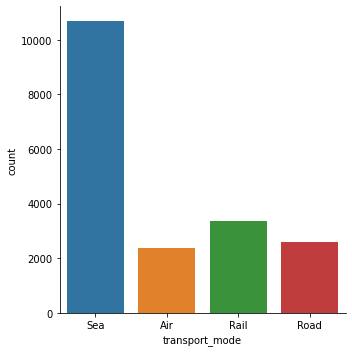

In [10]:
# Gráfico para los tipos de transporte
sns.catplot(x='transport_mode', data=datos,kind='count')

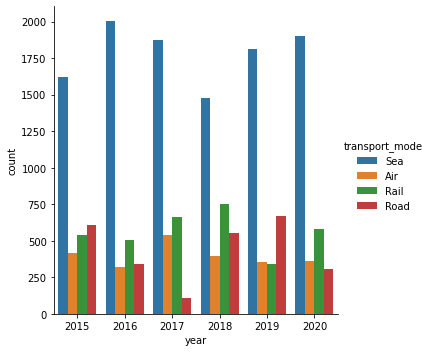

In [11]:
# Gráfico para los tipos de transporte por año
sns.catplot(x='year', data=datos, hue='transport_mode',kind='count')

In [12]:
#Muestra la cantidad de productos vendidos por medio de transporte
datos["transport_mode"].value_counts().to_frame()

,transport_mode
Sea,10688
Rail,3381
Road,2598
Air,2389


In [15]:
#Se creo una copia llamada ventas con la base de datos completa original
ventas=datos.nlargest(19056, 'total_value')
ventas

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
register_id,,,,,,,,,
5646,Exports,France,USA,2016,20/02/16,Cosmetics,Sea,Klorane Corp,285000000
5502,Exports,Netherlands,Belgium,2015,01/03/15,Meat,Road,Meat Beleggingen Bv,229000000
6098,Exports,France,Belgium,2019,19/02/19,Cosmetics,Road,L Oreal Co,148000000
6154,Exports,France,Belgium,2019,16/04/19,Pharmaceuticals,Road,Cubist Pharma F,142000000
814,Exports,China,Mexico,2020,25/03/20,Computers,Air,Lenovo Group Ltd,140000000
...,...,...,...,...,...,...,...,...,...
13143,Exports,France,Belgium,2017,05/07/17,Pharmaceuticals,Rail,Cubist Pharma F,0
13144,Exports,France,Belgium,2018,03/02/18,Pharmaceuticals,Rail,Cubist Pharma F,0
13147,Exports,France,Belgium,2018,07/02/18,Pharmaceuticals,Rail,Cubist Pharma F,0


In [17]:
#Se agrega el campo origin-destination a la base de datos ventas para conocer las rutas de origen - destino
ventas["origin-destination"] = ventas["origin"]+"-"+ventas["destination"]
ventas

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,origin-destination
register_id,,,,,,,,,,
5646,Exports,France,USA,2016,20/02/16,Cosmetics,Sea,Klorane Corp,285000000,France-USA
5502,Exports,Netherlands,Belgium,2015,01/03/15,Meat,Road,Meat Beleggingen Bv,229000000,Netherlands-Belgium
6098,Exports,France,Belgium,2019,19/02/19,Cosmetics,Road,L Oreal Co,148000000,France-Belgium
6154,Exports,France,Belgium,2019,16/04/19,Pharmaceuticals,Road,Cubist Pharma F,142000000,France-Belgium
814,Exports,China,Mexico,2020,25/03/20,Computers,Air,Lenovo Group Ltd,140000000,China-Mexico
...,...,...,...,...,...,...,...,...,...,...
13143,Exports,France,Belgium,2017,05/07/17,Pharmaceuticals,Rail,Cubist Pharma F,0,France-Belgium
13144,Exports,France,Belgium,2018,03/02/18,Pharmaceuticals,Rail,Cubist Pharma F,0,France-Belgium
13147,Exports,France,Belgium,2018,07/02/18,Pharmaceuticals,Rail,Cubist Pharma F,0,France-Belgium


In [19]:
#Muestra el valor total por producto
ventas.groupby('product').total_value.agg('max').to_frame()


,total_value
product,
Aerospace Parts,75000000
Cars,88000000
Cereals,80000000
Clothing,52000000
Coal Briquettes,17000000
Computers,140000000
Cosmetics,285000000
Crude Petroleum,79000000
Dairy,62000000


In [21]:
#Muestra la cantidad de productos vendidos por anio
ventas["year"].value_counts().to_frame()

,year
2015,3187
2017,3181
2019,3180
2018,3180
2016,3173
2020,3155


In [23]:
#Muestra el valor total por lugar de origen
ventas.groupby('origin').total_value.agg('max').to_frame()

,total_value
origin,
Australia,23000000
Austria,16000
Belgium,62000000
Brazil,29000000
Canada,103000000
China,140000000
France,285000000
Germany,88000000
India,22000000


In [24]:
#Muestra el valor total por destino
ventas.groupby('destination').total_value.agg('max').to_frame()

,total_value
destination,
Argentina,69000000
Austria,172000
Belgium,229000000
Belorussia,79000000
Brazil,83000000
Canada,58000000
China,80000000
Croatia,53000000
France,88000000


In [29]:
#Muestra el valor total por anio
#ventas.groupby('year').total_value.agg('max').to_frame()
ventas.groupby('year').total_value.agg('sum').to_frame()

,total_value
year,
2015,30998392000
2016,32148438000
2017,34428765000
2018,37133978000
2019,40941485000
2020,40040240000


In [33]:
#Muestra la ventas por producto y por origen-destino
ventas.groupby(['product', 'origin-destination']).total_value.agg('sum').to_frame()

total_value
product                   origin-destination                           
Aerospace Parts           USA-Argentina                      2132000000
                          USA-Belgium                        1047000000
                          USA-Brazil                          553000000
                          USA-Mexico                         4710000000
                          USA-Netherlands                    1032187000
                          USA-Singapore                      1599000000
                          USA-United Arab Emirates               119000
Cars                      Austria-France                          93000
                          Austria-Germany                        188000
                          Austria-Italy                          252000
                          Austria-Slovakia                       258000
                          Austria-Switzerland                    252000
                          Austria-USA                            112000
                          China-Mexico                        244000000
                          France-Germany                       51000000
                          France-Poland                      1030000000
                          Germany-Canada                       25178000
                          Germany-China                      2265000000
                          Germany-France                     1309071000
                          Germany-Italy                      1258000000
                          Germany-Mexico                     1806442000
                          Germany-Poland                      570000000
                          Germany-South Korea                 495000000
                          Germany-USA                         536780000
                          Germany-United Kingdom                2096000
                          Italy-Mexico                        680000000
                          Italy-Poland                        588000000
                          Japan-Brazil                       3368155000
                          Japan-Canada                        278000000
                          Japan-China                        2550000000
                          Japan-Mexico                       3918000000
                          Japan-Russia                           159000
                          Japan-Singapore                     340000000
                          Japan-South Korea                  1226000000
                          Japan-Spain                         368000000
                          Japan-Switzerland                   197000000
                          Japan-Thailand                      847000000
                          Japan-USA                           527000000
                          Mexico-Austria                        1030000
                          Mexico-Brazil                        94075000
                          Mexico-Canada                       194553000
                          Mexico-Germany                       26000000
                          Mexico-Japan                        183000000
                          Mexico-New Zealand                    2072000
                          Mexico-Peru                           1413000
                          Mexico-Singapore                      1658000
                          Mexico-USA                         2919801000
                          South Korea-Japan                   147000000
                          South Korea-Mexico                 1291000000
                          Spain-Belgium                       613000000
                          Spain-Brazil                        442000000
                          Spain-France                        345000000
                          Spain-Germany                      2161000000
                          Spain-Italy                         350000000
                          Sp

In [34]:
#Muestra el numero de ventas por producto y origen-destino
ventas.groupby('product') ['origin-destination'].value_counts().to_frame()

origin-destination
product                   origin-destination                                  
Aerospace Parts           USA-Netherlands                                  436
                          USA-Mexico                                       194
                          USA-Belgium                                      154
                          USA-United Arab Emirates                         142
                          USA-Argentina                                     97
                          USA-Singapore                                     75
                          USA-Brazil                                        20
Cars                      Japan-Brazil                                     306
                          Germany-China                                    266
                          United Kingdom-Belgium                           229
                          Germany-Mexico                                   208
                          Mexico-USA                                       208
                          Japan-Mexico                                     206
                          Japan-China                                      196
                          Germany-USA                                      183
                          United Kingdom-Spain                             176
                          Germany-France                                   159
                          United Kingdom-Ireland                           137
                          Spain-Germany                                    124
                          United Kingdom-USA                               122
                          United Kingdom-France                            107
                          United Kingdom-Italy                             100
                          Austria-Switzerland                               99
                          Spain-Russia                                      99
                          Austria-Italy                                     98
                          Austria-Slovakia                                  94
                          Germany-Canada                                    93
                          France-Poland                                     83
                          USA-Canada                                        81
                          Germany-South Korea                               78
                          Japan-Canada                                      70
                          Japan-Russia                                      68
                          Austria-Germany                                   66
                          Mexico-Brazil                                     66
                          South Korea-Mexico                                66
                          Mexico-New Zealand                                64
                          Japan-South Korea                                 62
                          Italy-Poland                                      58
                          United Kingdom-Canada                             58
                          Japan-Thailand                                    55
                          Spain-Belgium                                     53
                          Austria-USA                                       48
                          Germany-Italy                                     42
                          Germany-United Kingdom                            42
                          Spain-Mexico                                      41
                          Spain-France                                      40
                          Mexico-Canada                                     39
                          Mexico-Peru                                       38
                          Germany-Poland                                    36
                          Austr

In [47]:
#Muestra las rutas con mayor demanda
ventastop=ventas["origin-destination"].value_counts(ascending=False).to_frame("Mayor demanda")
ventastop

,Mayor demanda
South Korea-Vietnam,497
Netherlands-Belgium,437
USA-Netherlands,436
Japan-Mexico,385
China-Mexico,351
China-Japan,343
Germany-China,328
Japan-Brazil,306
Germany-France,299
South Korea-Japan,294


In [53]:
ventastop.describe()

,Mayor demanda
count,172.000000
mean,110.790698
std,93.973757
min,4.000000
25%,42.500000
50%,84.000000
75%,143.250000
max,497.000000


In [56]:
top10=ventastop.nlargest(10, 'Mayor demanda')
top10

,Mayor demanda
South Korea-Vietnam,497
Netherlands-Belgium,437
USA-Netherlands,436
Japan-Mexico,385
China-Mexico,351
China-Japan,343
Germany-China,328
Japan-Brazil,306
Germany-France,299
South Korea-Japan,294


In [61]:
#Muestra el valor total por anio
#ventas.groupby('year').total_value.agg('max').to_frame()
transportacion=ventas.groupby('transport_mode').total_value.agg('sum').to_frame()
transportacion

,total_value
transport_mode,
Air,38262147000
Rail,43628043000
Road,33270486000
Sea,100530622000


In [63]:
top3=transportacion.nlargest(3, 'total_value')
top3

,total_value
transport_mode,
Sea,100530622000
Rail,43628043000
Air,38262147000


In [ ]:
#Muestra las rutas con mayor demanda
#ventas["origin-destination"].value_counts().to_frame()

In [ ]:
#Muestra la demanda por producto en terminos de numero de articulos 
by_product = top6000.groupby("product")["origin-destination"].count().to_frame()
by_product

In [ ]:
Muestra los productos con importe de  ventas
by_product = top6000.groupby("product").sum()
by_product

In [65]:
#Para saber el valor de las ventas se utilizo la opcion de sumar el valor del campo total_value, por lo cual el importe total de las ventas es $215,691,298,000.00 este dato nos sera 
#util para saber en que paises debera enforcar esfuerzos para generar el 80% de sus ventas
ventas.sum(axis=0) 

direction             ExportsExportsExportsExportsExportsExportsExpo...
origin                FranceNetherlandsFranceFranceChinaFranceChinaF...
destination           USABelgiumBelgiumBelgiumMexicoUnited KingdomMe...
year                                                           38445410
date                  20/02/1601/03/1519/02/1916/04/1925/03/2023/04/...
product               CosmeticsMeatCosmeticsPharmaceuticalsComputers...
transport_mode        SeaRoadRoadRoadAirSeaAirSeaAirSeaAirAirRoadRai...
company_name          Klorane CorpMeat Beleggingen BvL Oreal CoCubis...
total_value                                                215691298000
origin-destination    France-USANetherlands-BelgiumFrance-BelgiumFra...
dtype: object

In [66]:
#Muestra los productos que estan en los 6000 mas vendidos, asi estan integrados los 6000 productos que generan el 80% de las ventas. Segun la regla 80-20, el 20% de los productos generan 80% de las ventas por lo tanto en este caso se selecciono aproximadamente el 20% de los productos top.
top6000=ventas.nlargest(6000, 'total_value')
top6000

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,origin-destination
register_id,,,,,,,,,,
5646,Exports,France,USA,2016,20/02/16,Cosmetics,Sea,Klorane Corp,285000000,France-USA
5502,Exports,Netherlands,Belgium,2015,01/03/15,Meat,Road,Meat Beleggingen Bv,229000000,Netherlands-Belgium
6098,Exports,France,Belgium,2019,19/02/19,Cosmetics,Road,L Oreal Co,148000000,France-Belgium
6154,Exports,France,Belgium,2019,16/04/19,Pharmaceuticals,Road,Cubist Pharma F,142000000,France-Belgium
814,Exports,China,Mexico,2020,25/03/20,Computers,Air,Lenovo Group Ltd,140000000,China-Mexico
...,...,...,...,...,...,...,...,...,...,...
3061,Exports,Japan,USA,2017,24/02/17,Machinery and electronics,Air,Panasonic Co,12000000,Japan-USA
2958,Exports,China,Spain,2016,08/04/16,Smartphones,Air,Xiaomi Corp,12000000,China-Spain
2855,Exports,China,Argentina,2015,29/05/15,Computers,Air,Lenovo Group Ltd,12000000,China-Argentina


In [67]:
#Muestra el valor total por lugar de origen
top6000.groupby('origin').total_value.agg('max').to_frame()

,total_value
origin,
Australia,23000000
Belgium,62000000
Brazil,29000000
Canada,103000000
China,140000000
France,285000000
Germany,88000000
India,22000000
Italy,86000000


In [76]:
#Muestra el valor total por lugar de destino
top6000.groupby('destination').total_value.agg('max').to_frame()

,total_value
destination,
Argentina,69000000
Belgium,229000000
Belorussia,79000000
Brazil,83000000
Canada,58000000
China,80000000
Croatia,53000000
France,88000000
Germany,101000000


In [77]:
#Muestra el valor total por lugar de destino
top6000.groupby('origin-destination').total_value.agg('max').to_frame()

,total_value
origin-destination,
Australia-Japan,23000000
Australia-Philippines,17000000
Belgium-France,62000000
Belgium-Germany,33000000
Belgium-Netherlands,39000000
Belgium-United Kingdom,62000000
Brazil-Argentina,20000000
Brazil-China,20000000
Brazil-Germany,17000000


In [74]:
#Muestra los productos que estan en los 6000 mas vendidos, asi estan integrados los 6000 productos que generan el 80% de las ventas. Segun la regla 80-20, el 20% de los productos generan 80% de las ventas por lo tanto en este caso se selecciono aproximadamente el 20% de los productos top.
top6000["product"].value_counts(ascending=False).to_frame()

,product
Cars,1106
Computers,569
Pharmaceuticals,518
Integrated circuits,517
Machinery and electronics,514
Smartphones,334
Aerospace Parts,329
Industrial machines,261
Crude Petroleum,238
Cosmetics,207


In [70]:
top80=top6000.nlargest(10, 'total_value')
top80

,direction,origin,destination,year,date,product,transport_mode,company_name,total_value,origin-destination
register_id,,,,,,,,,,
5646,Exports,France,USA,2016,20/02/16,Cosmetics,Sea,Klorane Corp,285000000,France-USA
5502,Exports,Netherlands,Belgium,2015,01/03/15,Meat,Road,Meat Beleggingen Bv,229000000,Netherlands-Belgium
6098,Exports,France,Belgium,2019,19/02/19,Cosmetics,Road,L Oreal Co,148000000,France-Belgium
6154,Exports,France,Belgium,2019,16/04/19,Pharmaceuticals,Road,Cubist Pharma F,142000000,France-Belgium
814,Exports,China,Mexico,2020,25/03/20,Computers,Air,Lenovo Group Ltd,140000000,China-Mexico
6008,Exports,France,United Kingdom,2018,23/04/18,Pharmaceuticals,Sea,Cubist Pharma F,128000000,France-United Kingdom
807,Exports,China,Mexico,2020,18/03/20,Computers,Air,Lenovo Group Ltd,127000000,China-Mexico
5980,Exports,France,United Kingdom,2018,26/03/18,Pharmaceuticals,Sea,Cubist Pharma F,127000000,France-United Kingdom
783,Exports,China,Mexico,2020,23/02/20,Smartphones,Air,Huawei Technologies Co,116000000,China-Mexico
